#정렬

정렬 : 데이터를 특정한 기준에 따라 순서대로 나열하는 것을 말한다.

# 1. 선택 정렬

처리되지 않는 데이터 중에서 가장 작은 데이터를 선택해 맨 앞에 있는 데이터와 바꾸는 것을 반복합니다.

7 5 9 0 3 1 6 2 4 8 `

의 배열이 있을때 처리되지 않는 가장 작은 데이터 0과 첫번째 데이터 7과 자리를 바꾼다.

0 5 9 7 3 1 6 2 4 8

에서 다시 처리되지 않는 가장 작은 데이터 1과 두번쨰 데이터 5의 자리를 바꾼다.

계속 반복해서 정렬하면 

0 1 2 3 4 5 6 7 8 으로 매번 탐색 범위가 감소된다.

전체 연산 횟수를 보면 n + (n-1) + (n-2) + .....+ 2가 된다.

마지막 2는 마지막 연산을 의미하고 공차가 1인 등차수열을 의미한다.

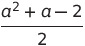

따라서 시간복잡도는 a의 제곱이다.

In [1]:
array = [7,5,9,0,3,1,6,2,4,8]

for i in range(len(array)):
  min_index = i
  for j in range(i+1, len(array)):
    if array[min_index] > array[j]:
      min_index = j
  #파이썬 스와프 기능 사용
  #만일 리스트의 0번째 요소와 3번째 요소의 값을 변경하고 싶다면,
  #array[0], array[3] = array[3], array[0]으로 변경이 가능하다.
  array[i],array[min_index] = array[min_index], array[i]

print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#2. 삽입 정렬

처리되지 않는 데이터를 하나씩 골라 적절한 위치에 삽입합니다.

선택 정렬에 비해 구현 난이도가 높은 편이지만, 일반적으로 더 효율적으로 동작합니다.

7 5 9 0 3 1 6 2 4 8  이런 배열이 있다고 할때

steop 0 : 첫번째 데이터 7은 그 자체로 정렬이 되어 있다고 판단하고, 두번째 데이터인 5가 어떤 위치로 들어갈지 판단합니다. 7의 왼쪽으로 들어가거나 오른쪽으로 들어가거나 두 경우만 존재합니다. 지금의 경우 5가 7보다 더 작으므로 왼쪽으로 이동합니다.

step 2 : 9의 경우 두번째 데이터인 7과 세번쨰 데이터인 9를 비교해서 데이터의 왼쪽 오른쪽을 판단해야 합니다.

step 3 : 0의 경우 세번쨰 데이터인 9와 네번째 데이터인 0을 비교해서 판단합니다. 이경우 0이 9보다 작으므로, 오른쪽, 다시 두번쨰 데이터와 비교, 그리고 다시 첫번쨰 데이터까지 비교 합니다.

In [2]:
array = [7,5,9,0,3,1,6,2,4,8]

for i in range(1,len(array)):
  for j in range(i,0,-1):
    if array[j] < array[j-1]: 
      array[j], array[j-1] = array[j-1], array[j]
    else:
      break
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


시간 복잡도는 선택 정렬과 동일하다. 

삽입정렬은 현재 리스트의 데이터가 거의 정렬되어 있는 상태라면 매우 빠르게 동작합니다.

최선의 경우 즉, 모두 다 정렬이 올바르게 되어 있다면 시간 복잡도는 O(n)입니다.

#퀵 정렬

기준 데이터를 설정하고 그 기준보다 큰 데이터가 작은 데이터의 위치를 바꾸는 방법입니다.

일반적인 상황에서 가장 많이 사용되는 정렬 알고리즘입니다.

병렬 정렬과 더불어 대부분의 프로그래밍 언어 정렬 라이브러리의 근간이 되는 알고리즘입니다.

가장 기본적인 첫 번째 데이터를 기준 데이터로 설정합니다.

예를 들어 보면

5 7 9 0 3 1 6 2 4 8 의 데이터가 존재합니다.

이때 현재 우리의 기준데이터는 첫 번쨰 데이터인 5입니다.

이때 왼쪽에서 부터 5보다 큰수 7과 오른쪽에서 5보다 작은 수인 4의 위치를 바꾸어 줍니다.

5 4 0 9 3 1 6 2 7 8이 됩니다.

이걸 반복하면 9와 2를 바꾸어주고 줍니다.

그러면 배열은 

5 4 2 0 3 1 6 9 7 8

이 되고 

이제 1과 6이 바꾸어 줄 순서가 왔습니다.

근데 우리는 이처럼 위치가 엇갈리는 경우에 기준 데이터와 작은 데이터의 위치를 바꾸어야 합니다.

그러면 

1 4 2 0 3 **5** 6 9 7 8

이제 5의 왼쪽에 있는 데이터는 모두 5보다 작고, 오른쪽에 있는 데이터는 5보다 큽니다. 이렇게 기준 데이터를 기준으로 데이터 묶음을 나누는 작업을 분할이라고 합니다.

이때 기준 데이터를 기준으로 왼쪽, 오른쪽 각각에 퀵 정렬을 수행해 줍니다.

**왼쪽은 더 큰 값을, 오른쪽은 더 작은 값을 가져 옵니다.**

이게 왜 퀵 정렬이냐?

시간 복잡도가 매우 낮습니다.



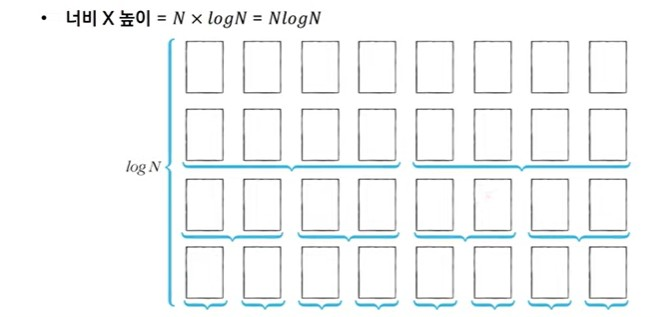

In [6]:
array = [5,7,9,0,3,1,6,2,4,8]

def quick_sort(array,start,end):
  if start >= end: #원소가 1개인 경우 종료
    return
  pivot = start
  left = start + 1
  right = end
  while (left <= right):
    #피벗보다 큰 데이터를 찾을 때까지 반복(왼쪽은 기준 값보다 큰 값, 오른쪽은 기준 값보다 작은 값), 지금은 한칸씩 올리면서 탐색
    while (left <= end and array[left] <= array[pivot]):
      left += 1
      #피벗보다 작은 데이터를 찾을 때까지 반복(왼쪽은 기준 값보다 큰 값, 오른쪽은 기준 값보다 작은 값), 지금은 한칸씩 내리면서 탐색
    while (right > start and array[right] >= array[pivot]):
      right -= 1
    if (left > right): #엇갈렸다면 작은 데이터와 피벗을 교체
      array[right], array[pivot] = array[pivot], array[right]
    else: #엇갈리지 않았다면 작은데이터와 큰데이터 교체
      array[left], array[right] = array[right], array[left]
  #분할 이후 왼쪽 부분과 오른쪽 부분이 각가 정렬 수행
  quick_sort(array,start,right-1)
  quick_sort(array,right+1, end)
quick_sort(array,0,len(array)-1)
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#개수 정렬
특정 조건이 부합할 때만 사용할 수 있지만 매우 빠르다.

개수 정렬은 데이터의 크기 범위가 제한되어 정수 형태로 표현할 수 있을 때 사용 가능합니다.

데이터가 7 5 9 0 3 1 6 2 9 1 4 8 0 5 2 순서로 있다고 하자.

이후 가장 작은 데이터부터, 가장 큰 데이터 까지의 범위가 모두 담길 수 있도록 리스트를 생성합니다.

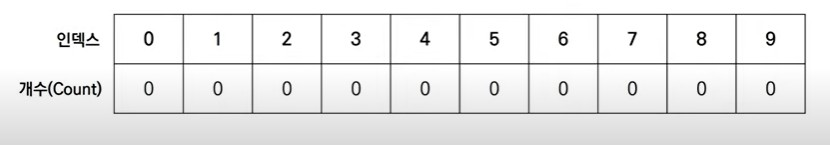

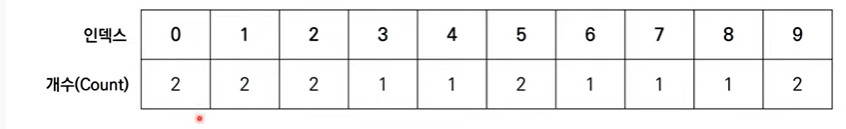

이때 0은 2개, 1은 2개 이런식으로 개수를 적어 나간다.

이후 0은 2개, 1은 2개, 2는 2개, 3은 1개 등등

이런 식으로 나열한다.

001122345567899

In [10]:
#모든 원소의 값이 0보다 크거나 같다고 가정
array = [7,5,9,0,3,1,6,2,9,1,4,8,0,5,2]
#모든 범위를 포함하는 리스트 선언(모든 값은 0으로 초기화)
count = [0] * (max(array) + 1)
#각 데이터에 해당하는 인덱스의 값 증가
for i in range(len(array)):
  count[array[i]] += 1
print(count)
for i in range(len(count)): # 리스트에 기록된 정렬 정보 확인
  for j in range(count[i]): 
    print(i,end=' ') #띄어쓰기를 구분으로 인덱스 출력

[2, 2, 2, 1, 1, 2, 1, 1, 1, 2]
0 0 1 1 2 2 3 4 5 5 6 7 8 9 9 